# **Optimisation of MLP and CNN Models for MNIST Handwritten Digits Classification**

The MNIST (Modified National Institute of Standards and Technology) dataset, is a widely used benchmark for evaluating machine learning models. It contains 70,000 grayscale images of handwritten digits under 10 categories (0 to 9) with 60000 training and 10000 test samples. The classification task is inherently suitable for neural networks due to the dataset’s structured input (28 × 28 images) and categorical output (10 classes). This notbook explores three tasks:<br>
1.	Task 1: Implementation and comparison of baseline and improved Multilayer Perceptron (MLPs).<br>
2.	Task 2: Development and comparison of baseline and improved Convolutional Neural Networks (CNNs).<br>
3.	Task 3: Evaluation of two different learning rates and two different optimisers in the performance of improved CNN model.


In [ ]:
#Import TensorFlow and NumPy libraries
import tensorflow as tf
import numpy as np
print(tf.__version__) #Prints the TensorFlow version

2.19.0


In [ ]:
#Import Keras module and Utilities
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical

In [ ]:
#Set seeds for reproducibility
tf.random.set_seed(1)
np.random.seed(1)

In [ ]:
#Load the MNIST dataset
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

In [ ]:
print("Train and test sample size: ", len(X_train), "," ,len(X_test))

Train and test sample size:  60000 , 10000


In [ ]:
print("Shape of training features and training label: ", X_train.shape, ",", y_train.shape )

Shape of training features and training label:  (60000, 28, 28) , (60000,)


## Plotting first five training samples of the Dataset

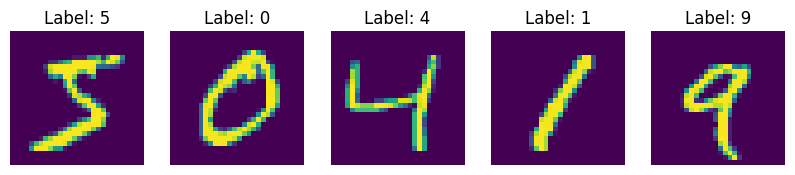

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,2))
for i in range(5):
  plt.subplot(1,5, i+1)
  plt.imshow(X_train[i])
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

# Data Pre-Processing

## Normalisation

In [ ]:
#Normalisation of pixel values in the images to the range 0 - 1
X_train = X_train / 255
X_test = X_test / 255

## Flattening the image

In [ ]:
#Flatten the images to 1D vector of size 784 (28 * 28)
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)

In [ ]:
print(X_train_flatten.shape)
print(X_test_flatten.shape)

(60000, 784)
(10000, 784)


## One Hot Encoding of Labels

In [ ]:
#Convert integer labels to one hot encoded vectors
y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)

# **Baseline MLP Model**

## Building, Compiling and Training the Model

In [ ]:
#Building a simple baseline model
model1 = keras.Sequential([
         keras.layers.Dense(10, input_shape=(784,), activation='softmax')
])
#Compiling the model
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Training the model
#Reserve 10% of the training data for validation
history1 = model1.fit(X_train_flatten, y_train_categorical, epochs=10, validation_split =0.1)

#Print the keys in the training history
print(history1.history.keys())


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8030 - loss: 0.7572 - val_accuracy: 0.9268 - val_loss: 0.2704
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9105 - loss: 0.3218 - val_accuracy: 0.9317 - val_loss: 0.2446
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9186 - loss: 0.2942 - val_accuracy: 0.9348 - val_loss: 0.2352
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9220 - loss: 0.2815 - val_accuracy: 0.9362 - val_loss: 0.2303
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9241 - loss: 0.2736 - val_accuracy: 0.9370 - val_loss: 0.2275
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9262 - loss: 0.2681 - val_accuracy: 0.9377 - val_loss: 0.2257
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9275 - loss: 0.2638 - val_accuracy: 0.9375 - val_loss: 0.2245
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9283 - loss: 0.2604 - 

## Plotting Training/Validation Accuracy and Loss

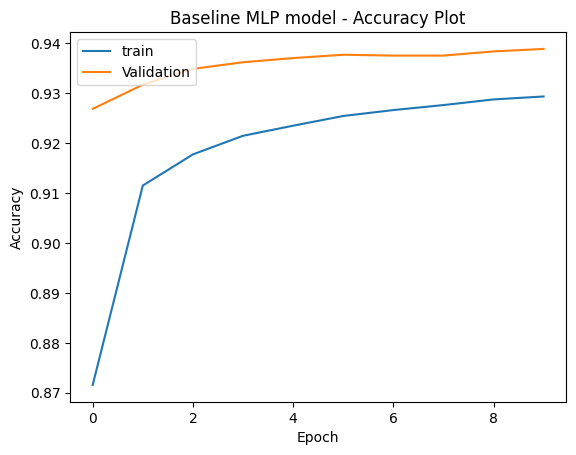

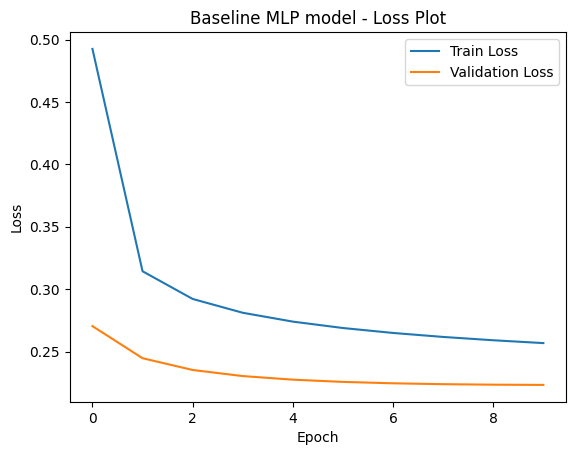

In [ ]:
# Plot training and validation accuracy per epoch
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label= 'Validation Accuracy')
plt.title('Baseline MLP model - Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss per epoch
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label= 'Validation Loss')
plt.title('Baseline MLP model - Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Evaluate the test set using the Baseline MLP Model

In [ ]:
test_loss, test_acc = model1.evaluate(X_test_flatten, y_test_categorical, verbose=0)
print("Baseline MLP Test Accuracy: ", test_acc)
print("Baseline MLP Test Loss: ", test_loss)

Baseline MLP Test Accuracy:  0.9253000020980835
Baseline MLP Test Loss:  0.26563408970832825


## Confusion Matrix for Baseline MLP model

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step


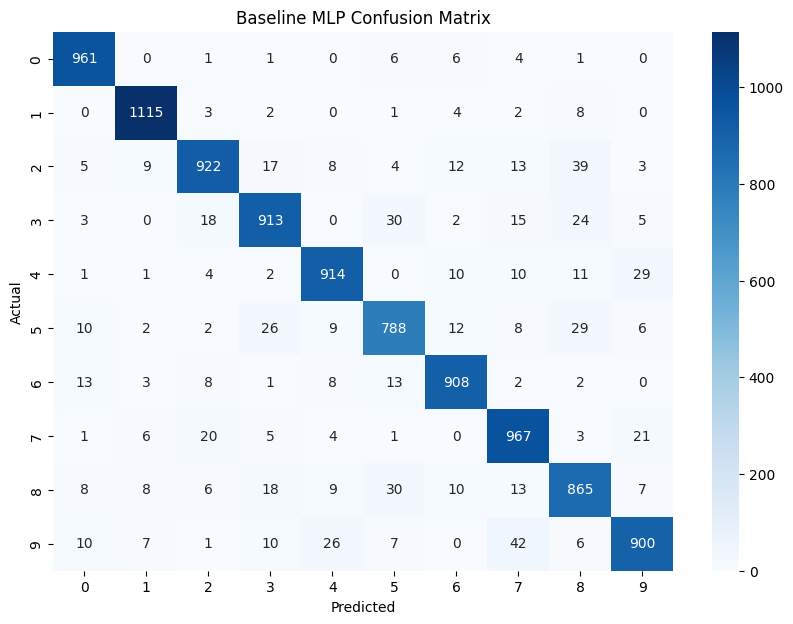

In [ ]:
import seaborn as sn
# Make predictions
y_predicted = model1.predict(X_test_flatten)
#Convert predictions to class labels
y_predicted_labels = np.argmax(y_predicted, axis=1)
y_test_labels = np.argmax(y_test_categorical, axis=1)

#Confusion Matrix
cm_baseline_mlp = tf.math.confusion_matrix(labels=y_test_labels, predictions=y_predicted_labels).numpy()
#Plot the confusion Matrix
plt.figure(figsize = (10,7))
sn.heatmap(cm_baseline_mlp, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Baseline MLP Confusion Matrix')
plt.show()

## Plotting first five misclassified samples

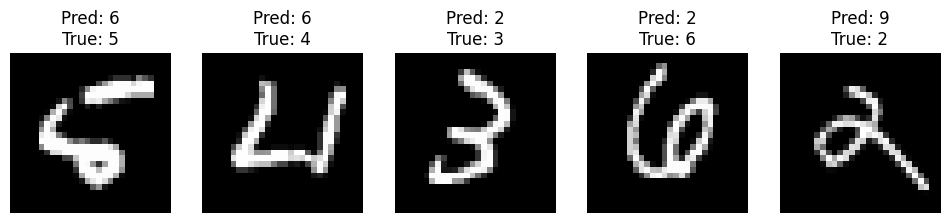

In [ ]:
# Find indices of misclassified samples
misclassified_indices = np.where(y_predicted_labels != y_test_labels)[0]

# Plot first 5 misclassified samples
plt.figure(figsize=(12, 3))
for i, idx in enumerate(misclassified_indices[:5]):  # take first 5 misclassified
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"Pred: {y_predicted_labels[idx]}\nTrue: {y_test_labels[idx]}")
    plt.axis('off')
plt.show()

## **Per-Class Test Accuracy using Baseline MLP**

In [ ]:
# Per-class accuracy
per_class_accuracy = cm_baseline_mlp.diagonal() / cm_baseline_mlp.sum(axis=1)

for i, acc in enumerate(per_class_accuracy):
    print(f"Class {i}: Accuracy = {acc:.4f}")

Class 0: Accuracy = 0.9806
Class 1: Accuracy = 0.9824
Class 2: Accuracy = 0.8934
Class 3: Accuracy = 0.9040
Class 4: Accuracy = 0.9308
Class 5: Accuracy = 0.8834
Class 6: Accuracy = 0.9478
Class 7: Accuracy = 0.9407
Class 8: Accuracy = 0.8881
Class 9: Accuracy = 0.8920


#**Improved MLP Model**

## Building, Compiling and Training the Model

In [ ]:
#Building the improved model with two dense layers
model2 = keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
#Compiling the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Training the model for 10 epochs
# Use 10% of training data as validation set
history2 = model2.fit(X_train_flatten, y_train_categorical, epochs=10, validation_split =0.1)
print(history2.history.keys())

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8722 - loss: 0.4602 - val_accuracy: 0.9655 - val_loss: 0.1172
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9627 - loss: 0.1318 - val_accuracy: 0.9757 - val_loss: 0.0856
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9744 - loss: 0.0865 - val_accuracy: 0.9750 - val_loss: 0.0780
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9813 - loss: 0.0622 - val_accuracy: 0.9778 - val_loss: 0.0731
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9866 - loss: 0.0464 - val_accuracy: 0.9768 - val_loss: 0.0760
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9905 - loss: 0.0353 - val_accuracy: 0.9772 - val_loss: 0.0767
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9934 - loss: 0.0264 - val_accuracy: 0.9755 - val_loss: 0.0810
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9949 - loss: 0.0199 - val_accurac

## Plotting Training/Validation Accuracy and Loss

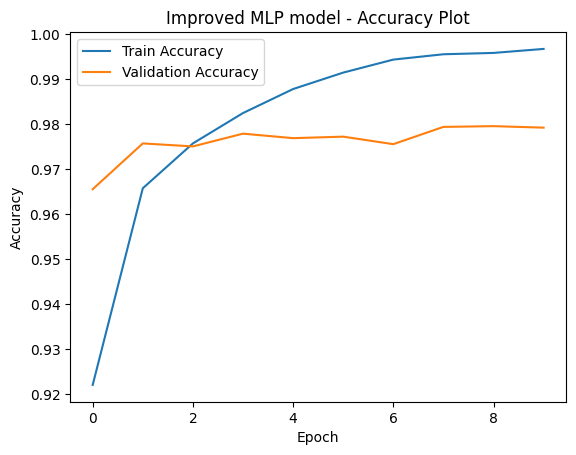

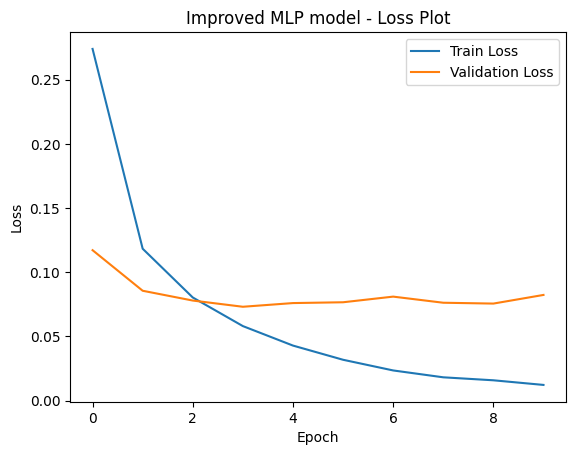

In [ ]:
# Plot training and validation accuracy per epoch
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label= 'Validation Accuracy')
plt.title('Improved MLP model - Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training and validation loss per epoch
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label= 'Validation Loss')
plt.title('Improved MLP model - Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Evaluate the Test Set using Improved MLP Model

In [ ]:
test_loss, test_acc = model2.evaluate(X_test_flatten, y_test_categorical, verbose=0)
print("Improved MLP Test Accuracy: ", test_acc)
print("Improved MLP Test Loss: ", test_loss)

Improved MLP Test Accuracy:  0.9757000207901001
Improved MLP Test Loss:  0.09131559729576111


## Confusion Matrix for Improved MLP model

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step


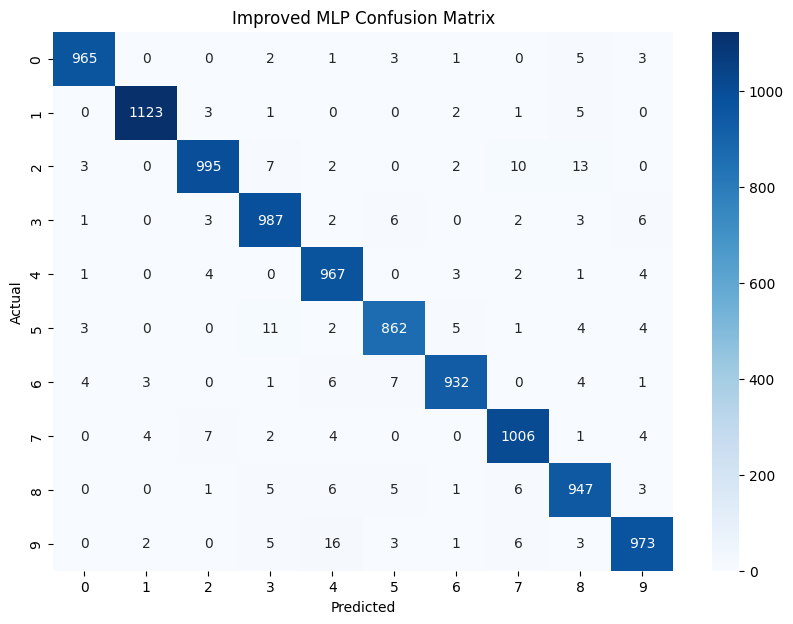

In [ ]:
# Make predictions
y_predicted = model2.predict(X_test_flatten)
#Convert predictions to class labels
y_predicted_labels = np.argmax(y_predicted, axis=1)
#Confusion Matrix
y_test_labels = np.argmax(y_test_categorical, axis=1)
cm_improved_mlp = tf.math.confusion_matrix(labels=y_test_labels, predictions=y_predicted_labels).numpy()
#Plot the confusion Matrix
plt.figure(figsize = (10,7))
sn.heatmap(cm_improved_mlp, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Improved MLP Confusion Matrix')
plt.show()

## Per Class Test Accuracy using Improved MLP

In [ ]:
# Per-class accuracy
per_class_accuracy = cm_improved_mlp.diagonal() / cm_improved_mlp.sum(axis=1)

for i, acc in enumerate(per_class_accuracy):
    print(f"Class {i}: Accuracy = {acc:.4f}")

Class 0: Accuracy = 0.9847
Class 1: Accuracy = 0.9894
Class 2: Accuracy = 0.9641
Class 3: Accuracy = 0.9772
Class 4: Accuracy = 0.9847
Class 5: Accuracy = 0.9664
Class 6: Accuracy = 0.9729
Class 7: Accuracy = 0.9786
Class 8: Accuracy = 0.9723
Class 9: Accuracy = 0.9643


## Plot first five misclassified samples

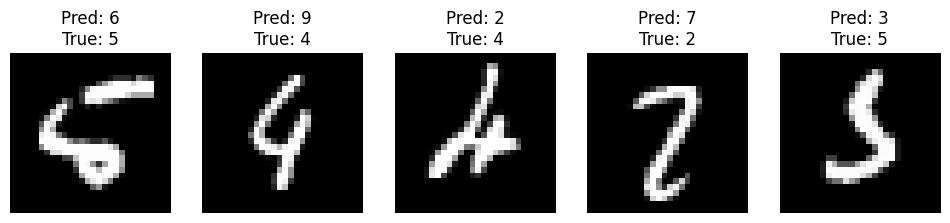

In [ ]:
# Find indices of misclassified samples
misclassified_indices = np.where(y_predicted_labels != y_test_labels)[0]

# Plot first 5 misclassified samples
plt.figure(figsize=(12, 3))
for i, idx in enumerate(misclassified_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"Pred: {y_predicted_labels[idx]}\nTrue: {y_test_labels[idx]}")
    plt.axis('off')
plt.show()

# Reshaping the input for CNN models

In [ ]:
#Reshaping the data to 4D
# Shape: (num_samples, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)   # (num_samples, height, width, channels)
X_test = X_test.reshape(-1, 28, 28, 1)

# Baseline CNN model

In [ ]:
#Building the baseline CNN model
model_cnn1 = keras.Sequential([
# Convolutional layer: 32 filters, 3x3 kernel, ReLU activation
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),#Fully connected layer with 64 neurons
    keras.layers.Dense(10, activation='softmax')#Output layer with 10 neurons and softmax
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compiling and Training the Model

In [ ]:
# Compile the model
# Optimizer: Adam (adaptive learning rate)
# Loss: categorical crossentropy (for multi-class classification)
# Metric: accuracy
model_cnn1.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
# Train the model
# Use 10% of training data as validation set
history_cnn1 = model_cnn1.fit(X_train, y_train_categorical,
                              epochs=15, validation_split=0.1)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8948 - loss: 0.3633 - val_accuracy: 0.9805 - val_loss: 0.0676
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9795 - loss: 0.0671 - val_accuracy: 0.9847 - val_loss: 0.0565
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9876 - loss: 0.0414 - val_accuracy: 0.9878 - val_loss: 0.0513
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9921 - loss: 0.0273 - val_accuracy: 0.9868 - val_loss: 0.0527
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9950 - loss: 0.0183 - val_accuracy: 0.9865 - val_loss: 0.0593
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9959 - loss: 0.0136 - val_accuracy: 0.9862 - val_loss: 0.0643
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9964 - loss: 0.0114 - val_accuracy: 0.9855 - val_loss: 0.0599
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9975 -

## Plotting Training/Validation Accuracy & Loss

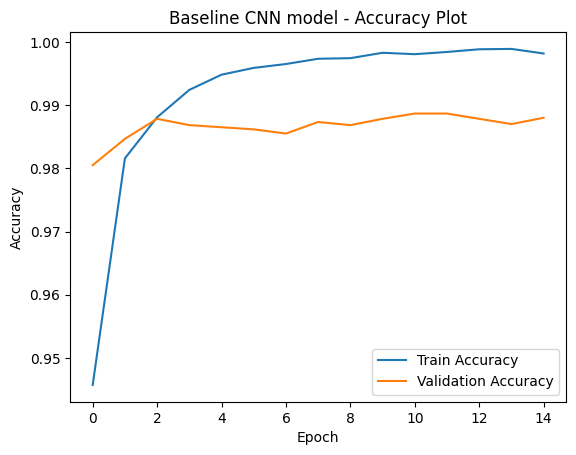

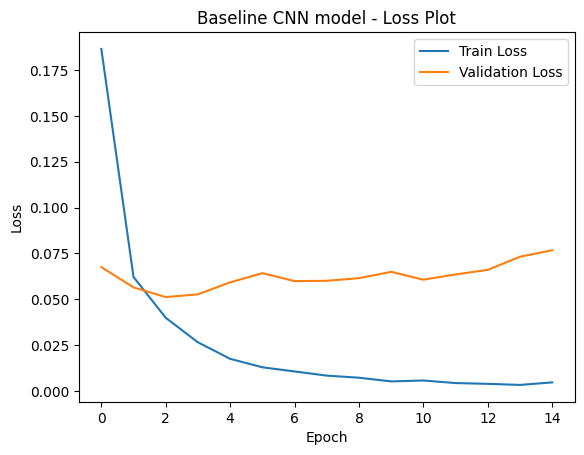

In [ ]:
# Plot training & validation accuracy
plt.plot(history_cnn1.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Baseline CNN model - Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history_cnn1.history['loss'], label='Train Loss')
plt.plot(history_cnn1.history['val_loss'], label='Validation Loss')
plt.title('Baseline CNN model - Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluate the test set using Baseline CNN model

In [ ]:
# Evaluate the model on test set
test_loss, test_acc = model_cnn1.evaluate(X_test, y_test_categorical, verbose=0)
print("Baseline CNN Test Accuracy:", test_acc)
print("Baseline CNN Test Loss:", test_loss)

Baseline CNN Test Accuracy: 0.9850000143051147
Baseline CNN Test Loss: 0.07273600250482559


## Confusion Matrix for Baseline CNN model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


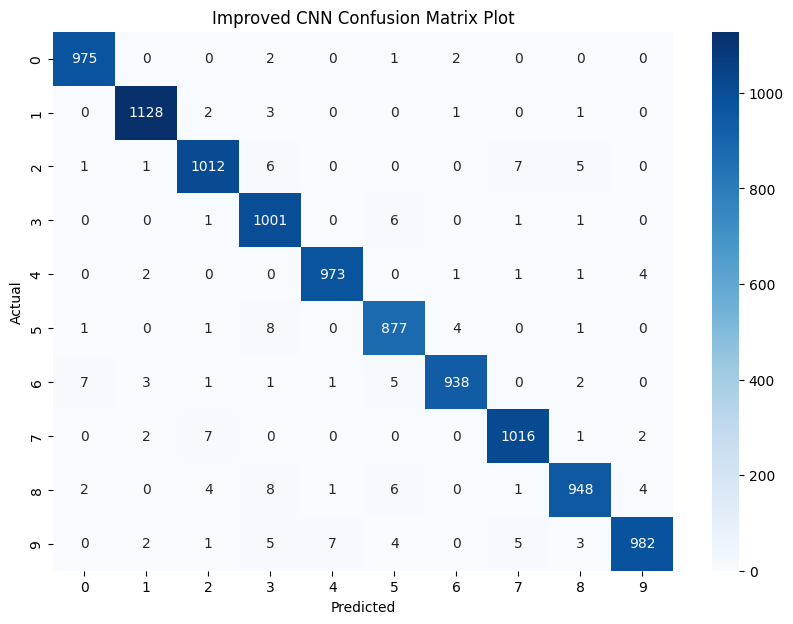

In [ ]:
# Make predictions on the test set using the baseline CNN model
y_predicted = model_cnn1.predict(X_test)

# Convert the predicted probabilities (softmax outputs) to class labels
y_predicted_labels = np.argmax(y_predicted, axis=1)

# Convert the true one-hot encoded labels to class labels
y_test_labels = np.argmax(y_test_categorical, axis=1)

# Compute the confusion matrix
cm_baseline_cnn = tf.math.confusion_matrix(
    labels=y_test_labels,       # True labels
    predictions=y_predicted_labels  # Predicted labels
).numpy()  # Convert TensorFlow tensor to NumPy array

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10,7))
sn.heatmap(cm_baseline_cnn, annot=True, fmt='d', cmap='Blues')  # Annotate cells with counts
plt.xlabel('Predicted')  # X-axis label
plt.ylabel('Actual')     # Y-axis label
plt.title('Improved CNN Confusion Matrix Plot')  # Plot title
plt.show()

## Per-Class Test Accuracy

In [ ]:
# Per-class accuracy
per_class_accuracy = cm_baseline_cnn.diagonal() / cm_baseline_cnn.sum(axis=1)
for i, acc in enumerate(per_class_accuracy):
    print(f"Class {i}: Accuracy = {acc:.4f}")

Class 0: Accuracy = 0.9949
Class 1: Accuracy = 0.9938
Class 2: Accuracy = 0.9806
Class 3: Accuracy = 0.9911
Class 4: Accuracy = 0.9908
Class 5: Accuracy = 0.9832
Class 6: Accuracy = 0.9791
Class 7: Accuracy = 0.9883
Class 8: Accuracy = 0.9733
Class 9: Accuracy = 0.9732


## Plot first five misclassified samples

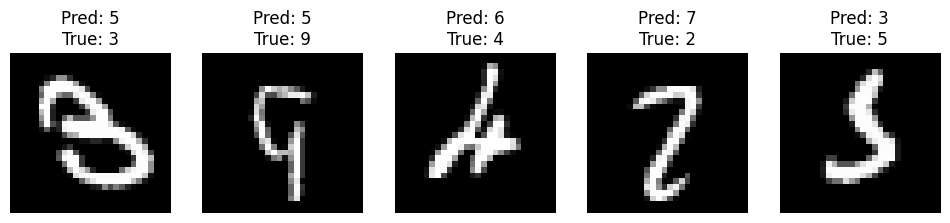

In [ ]:
# Find indices of misclassified samples
misclassified_indices = np.where(y_predicted_labels != y_test_labels)[0]

# Plot first 5 misclassified samples
plt.figure(figsize=(12, 3))
for i, idx in enumerate(misclassified_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"Pred: {y_predicted_labels[idx]}\nTrue: {y_test_labels[idx]}")
    plt.axis('off')
plt.show()

# Improved CNN model

## Building the Improved CNN Model

In [ ]:
def build_improved_cnn(input_shape=(28,28,1), num_classes=10):
    model = keras.Sequential([

        # First convolutional block
        keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), # 32 filters of size 3x3
        keras.layers.BatchNormalization(),  # Normalize activations to speed up training
        keras.layers.MaxPooling2D((2,2)),   # Downsample feature maps by 2x2

        # Second convolutional block
        keras.layers.Conv2D(64, (3,3), activation='relu'),  # 64 filters of size 3x3
        keras.layers.BatchNormalization(),  # Normalize activations again
        keras.layers.MaxPooling2D((2,2)),   # Further downsample

        # Flatten before feeding into dense layers
        keras.layers.Flatten(),  # Convert 2D feature maps into 1D vector

        # Fully connected (dense) layer with dropout
        keras.layers.Dense(128, activation='relu'),  # Dense hidden layer with 128 neurons
        keras.layers.Dropout(0.5),  # Dropout with 50% probability to reduce overfitting

        # Output layer
        keras.layers.Dense(num_classes, activation='softmax')  # 10 output neurons for classification
    ])

    return model


## Compiling and Training the Model

In [ ]:
model_cnn2 = build_improved_cnn()
# Compile the improved CNN
model_cnn2.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Train the model
history_cnn2 = model_cnn2.fit(
    X_train,
    y_train_categorical,
    epochs=15,
    batch_size=128,
    validation_split=0.1,
  )

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 84ms/step - accuracy: 0.8491 - loss: 0.5193 - val_accuracy: 0.9192 - val_loss: 0.2649
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 35s 82ms/step - accuracy: 0.9712 - loss: 0.0955 - val_accuracy: 0.9902 - val_loss: 0.0376
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - accuracy: 0.9804 - loss: 0.0648 - val_accuracy: 0.9900 - val_loss: 0.0347
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 82ms/step - accuracy: 0.9844 - loss: 0.0518 - val_accuracy: 0.9917 - val_loss: 0.0342
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 80ms/step - accuracy: 0.9854 - loss: 0.0474 - val_accuracy: 0.9915 - val_loss: 0.0413
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.9870 - loss: 0.0409 - val_accuracy: 0.9895 - val_loss: 0.0482
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 83ms/step - accuracy: 0.9897 - loss: 0.0337 - val_accuracy: 0.9898 - val_loss: 0.0430
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 84ms/step - accuracy: 0.9898 - loss: 0.0324 - 

## Plotting Training/Validation Accuracy & Loss

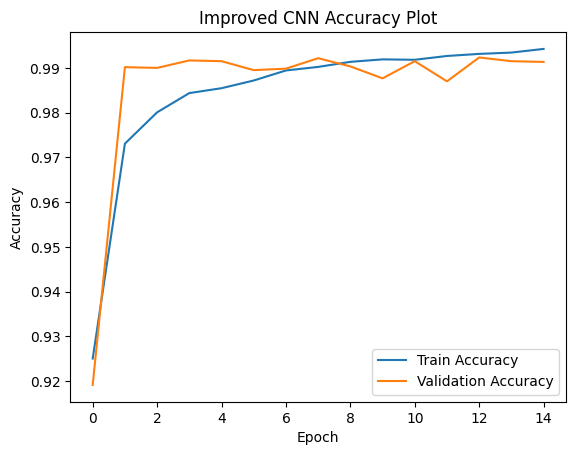

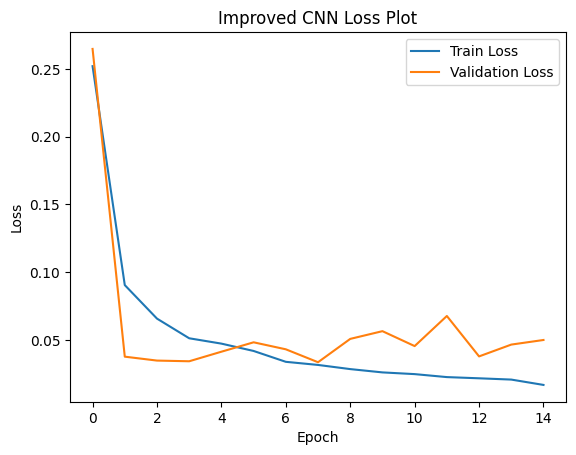

In [ ]:
# Plot training & validation accuracy
plt.plot(history_cnn2.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Improved CNN Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history_cnn2.history['loss'], label='Train Loss')
plt.plot(history_cnn2.history['val_loss'], label='Validation Loss')
plt.title('Improved CNN Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluate the Test Set using the Improved CNN Model

In [ ]:
# Evaluate the improved CNN on test set
test_loss2, test_acc2 = model_cnn2.evaluate(X_test, y_test_categorical, verbose=0)
print("Improved CNN Test Accuracy:", test_acc2)
print("Improved CNN Test Loss:", test_loss2)

Improved CNN Test Accuracy: 0.9918000102043152
Improved CNN Test Loss: 0.036409083753824234


## Confusion Matrix for Improved CNN Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


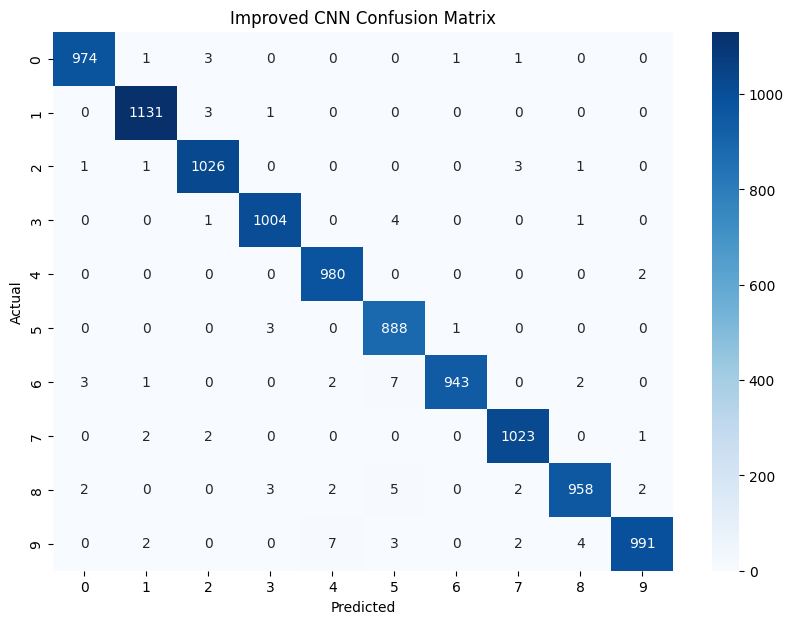

In [ ]:
y_predicted = model_cnn2.predict(X_test)
y_predicted_labels = np.argmax(y_predicted, axis=1)
y_test_labels = np.argmax(y_test_categorical, axis=1)
cm_improved_cnn = tf.math.confusion_matrix(labels=y_test_labels, predictions=y_predicted_labels).numpy()

plt.figure(figsize = (10,7))
sn.heatmap(cm_improved_cnn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Improved CNN Confusion Matrix')
plt.show()

## Per-Class Test Accuracy with Improved CNN Model

In [ ]:
# Per-class accuracy
per_class_accuracy = cm_improved_cnn.diagonal() / cm_improved_cnn.sum(axis=1)
for i, acc in enumerate(per_class_accuracy):
    print(f"Class {i}: Accuracy = {acc:.4f}")

Class 0: Accuracy = 0.9939
Class 1: Accuracy = 0.9965
Class 2: Accuracy = 0.9942
Class 3: Accuracy = 0.9941
Class 4: Accuracy = 0.9980
Class 5: Accuracy = 0.9955
Class 6: Accuracy = 0.9843
Class 7: Accuracy = 0.9951
Class 8: Accuracy = 0.9836
Class 9: Accuracy = 0.9822


## Plot first five misclassified samples

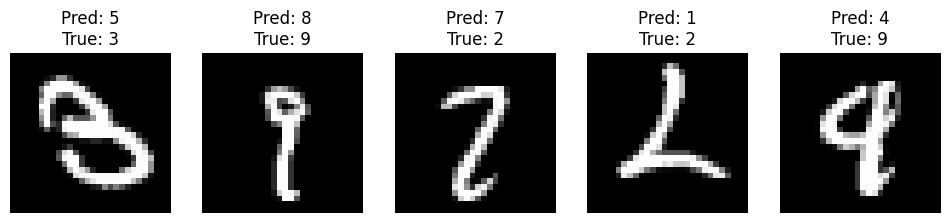

In [ ]:
# Find indices of misclassified samples
misclassified_indices = np.where(y_predicted_labels != y_test_labels)[0]

# Plot first 5 misclassified samples
plt.figure(figsize=(12, 3))
for i, idx in enumerate(misclassified_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"Pred: {y_predicted_labels[idx]}\nTrue: {y_test_labels[idx]}")
    plt.axis('off')
plt.show()

# Experimenting with different Learning Rates

## Experiment 1: Adam with smaller learning rate (0.0005)

## Compiling and Training the Model

In [ ]:
# Compile improved CNN model using Adam optimizer with a reduced learning rate (0.0005)
model_cnn2_adam_lr_small = build_improved_cnn()
model_cnn2_adam_lr_small.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

# Train the model
history_cnn2_adam_lr_small = model_cnn2_adam_lr_small.fit(X_train, y_train_categorical,
                              epochs=15, batch_size=128,
                              validation_split=0.1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 92ms/step - accuracy: 0.8196 - loss: 0.6205 - val_accuracy: 0.9680 - val_loss: 0.1414
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 91ms/step - accuracy: 0.9700 - loss: 0.1030 - val_accuracy: 0.9877 - val_loss: 0.0399
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.9790 - loss: 0.0715 - val_accuracy: 0.9905 - val_loss: 0.0353
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 94ms/step - accuracy: 0.9841 - loss: 0.0531 - val_accuracy: 0.9898 - val_loss: 0.0315
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - accuracy: 0.9857 - loss: 0.0476 - val_accuracy: 0.9883 - val_loss: 0.0392
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 98ms/step - accuracy: 0.9883 - loss: 0.0385 - val_accuracy: 0.9893 - val_loss: 0.0349
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 78s 89ms/step - accuracy: 0.9897 - loss: 0.0349 - val_accuracy: 0.9912 - val_loss: 0.0343
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - accuracy: 0.9912 - loss: 0.0277 - 

## Plotting Training/Validation Accuracy & Loss

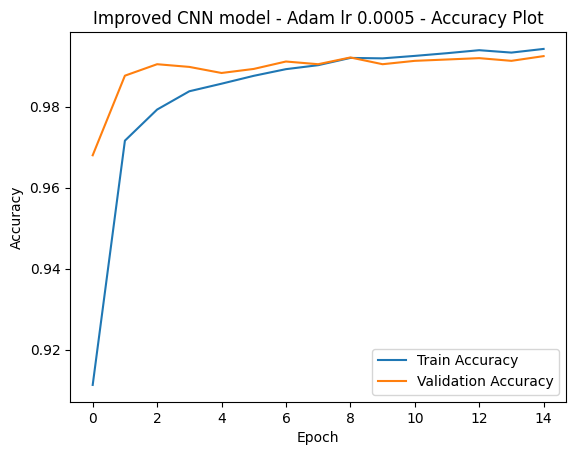

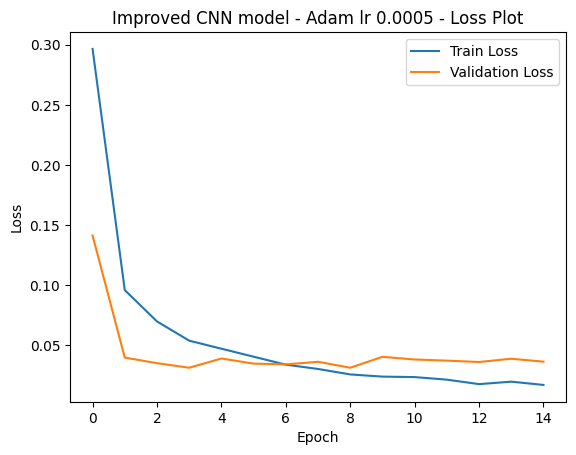

In [ ]:
# Plot training & validation accuracy
plt.plot(history_cnn2_adam_lr_small.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn2_adam_lr_small.history['val_accuracy'], label='Validation Accuracy')
plt.title('Improved CNN model - Adam lr 0.0005 - Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history_cnn2_adam_lr_small.history['loss'], label='Train Loss')
plt.plot(history_cnn2_adam_lr_small.history['val_loss'], label='Validation Loss')
plt.title('Improved CNN model - Adam lr 0.0005 - Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluate the Test Set using the Improved CNN Model with Adam optimiser with a lr 0.0005

In [ ]:
# Evaluate on test set
test_loss, test_acc = model_cnn2_adam_lr_small.evaluate(X_test, y_test_categorical, verbose=0)
print(f"Adam (lr=0.0005) Test Accuracy: {test_acc:.4f}, Loss: {test_loss:.4f}")

Adam (lr=0.0005) Test Accuracy: 0.9928, Loss: 0.0279


## Experiment 2:Adam with larger learning rate (0.01)

## Compiling and building the model

In [ ]:
# Compile improved CNN model using Adam optimizer with higher learning rate (0.01)
model_cnn2_adam_lr_large = build_improved_cnn()
model_cnn2_adam_lr_large.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

# Train the model
history_cnn2_adam_lr_large = model_cnn2_adam_lr_large.fit(X_train, y_train_categorical,
                              epochs=15, batch_size=128,
                              validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 87ms/step - accuracy: 0.7773 - loss: 0.8945 - val_accuracy: 0.9260 - val_loss: 0.2637
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9488 - loss: 0.1791 - val_accuracy: 0.9855 - val_loss: 0.0476
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.9624 - loss: 0.1281 - val_accuracy: 0.9883 - val_loss: 0.0501
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9694 - loss: 0.1080 - val_accuracy: 0.9867 - val_loss: 0.0617
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 34s 82ms/step - accuracy: 0.9728 - loss: 0.0967 - val_accuracy: 0.9877 - val_loss: 0.0624
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 84ms/step - accuracy: 0.9750 - loss: 0.0876 - val_accuracy: 0.9887 - val_loss: 0.0473
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 79ms/step - accuracy: 0.9758 - loss: 0.0847 - val_accuracy: 0.9877 - val_loss: 0.0554
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 0.9769 - loss: 0.0799 - 

## Plotting Training/Validation Accuracy & Loss

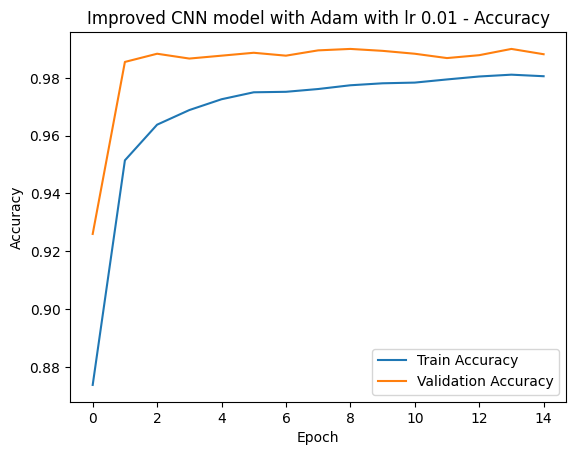

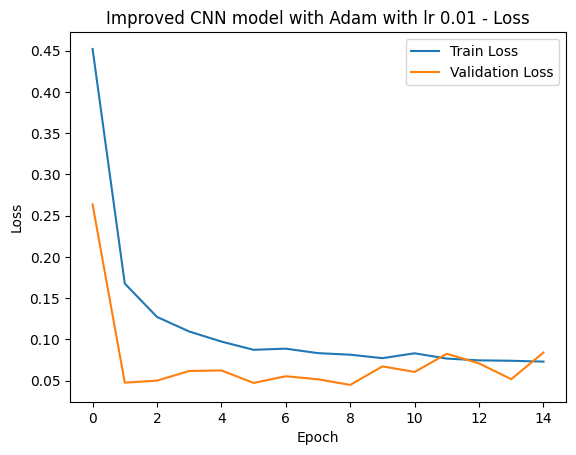

In [ ]:
# Plot training & validation accuracy
plt.plot(history_cnn2_adam_lr_large.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn2_adam_lr_large.history['val_accuracy'], label='Validation Accuracy')
plt.title('Improved CNN model with Adam with lr 0.01 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history_cnn2_adam_lr_large.history['loss'], label='Train Loss')
plt.plot(history_cnn2_adam_lr_large.history['val_loss'], label='Validation Loss')
plt.title('Improved CNN model with Adam with lr 0.01 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluate the Test Set using the Improved CNN Model with Adam optimiser with a lr 0.01

In [ ]:
# Evaluate on test set
test_loss, test_acc = model_cnn2_adam_lr_large.evaluate(X_test, y_test_categorical, verbose=0)
print(f"Adam (lr=0.01) Test Accuracy: {test_acc:.4f}, Loss: {test_loss:.4f}")

Adam (lr=0.01) Test Accuracy: 0.9891, Loss: 0.0633


# Experimenting with SGD with Momentum Optimiser instead of Adam

## Experiment 3: SGD with momentum with learning rate 0.01 and momentum 0.9

In [ ]:
#  Compile improved CNN model using SGD with momentum optimizer with learning rate 0.01
model_sgd = build_improved_cnn()
model_sgd.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history_sgd = model_sgd.fit(
    X_train, y_train_categorical,
    epochs=15, batch_size=128,
    validation_split=0.1, verbose=2
)

Epoch 1/15
422/422 - 33s - 78ms/step - accuracy: 0.9118 - loss: 0.2993 - val_accuracy: 0.9702 - val_loss: 0.1013
Epoch 2/15
422/422 - 33s - 77ms/step - accuracy: 0.9666 - loss: 0.1096 - val_accuracy: 0.9880 - val_loss: 0.0418
Epoch 3/15
422/422 - 42s - 99ms/step - accuracy: 0.9755 - loss: 0.0797 - val_accuracy: 0.9902 - val_loss: 0.0391
Epoch 4/15
422/422 - 33s - 77ms/step - accuracy: 0.9801 - loss: 0.0682 - val_accuracy: 0.9902 - val_loss: 0.0385
Epoch 5/15
422/422 - 35s - 84ms/step - accuracy: 0.9827 - loss: 0.0583 - val_accuracy: 0.9887 - val_loss: 0.0439
Epoch 6/15
422/422 - 38s - 90ms/step - accuracy: 0.9844 - loss: 0.0521 - val_accuracy: 0.9913 - val_loss: 0.0355
Epoch 7/15
422/422 - 40s - 95ms/step - accuracy: 0.9867 - loss: 0.0430 - val_accuracy: 0.9905 - val_loss: 0.0387
Epoch 8/15
422/422 - 32s - 77ms/step - accuracy: 0.9870 - loss: 0.0409 - val_accuracy: 0.9897 - val_loss: 0.0377
Epoch 9/15
422/422 - 41s - 97ms/step - accuracy: 0.9878 - loss: 0.0389 - val_accuracy: 0.9890 - 

## Plotting Training/Validation Accuracy & Loss

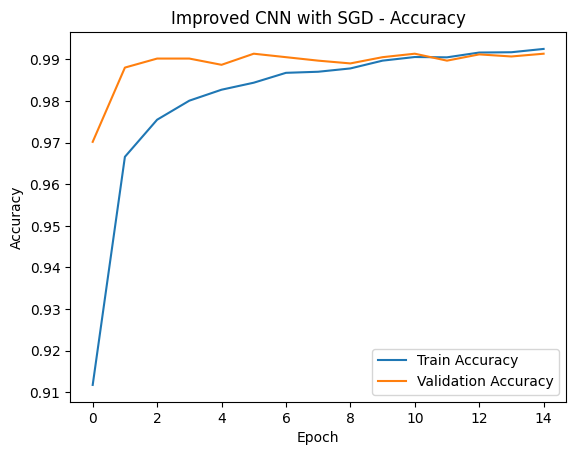

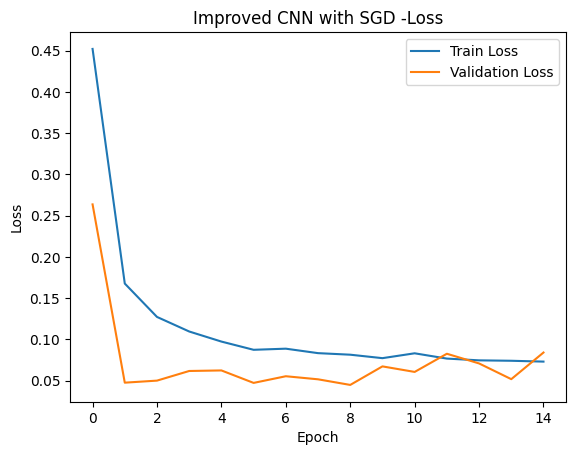

In [ ]:
# Plot training & validation accuracy
plt.plot(history_sgd.history['accuracy'], label='Train Accuracy')
plt.plot(history_sgd.history['val_accuracy'], label='Validation Accuracy')
plt.title('Improved CNN with SGD - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history_cnn2_adam_lr_large.history['loss'], label='Train Loss')
plt.plot(history_cnn2_adam_lr_large.history['val_loss'], label='Validation Loss')
plt.title('Improved CNN with SGD -Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluate the Test Set using the Improved CNN Model with SGD Optimiser

In [ ]:
#Evaluate on test set
test_loss, test_acc = model_sgd.evaluate(X_test, y_test_categorical, verbose=0)
print(f"SGD (lr=0.01, momentum=0.9),Test Accuracy: {test_acc:.4f}, Loss: {test_loss:.4f}")

SGD (lr=0.01, momentum=0.9),Test Accuracy: 0.9926, Loss: 0.0259


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


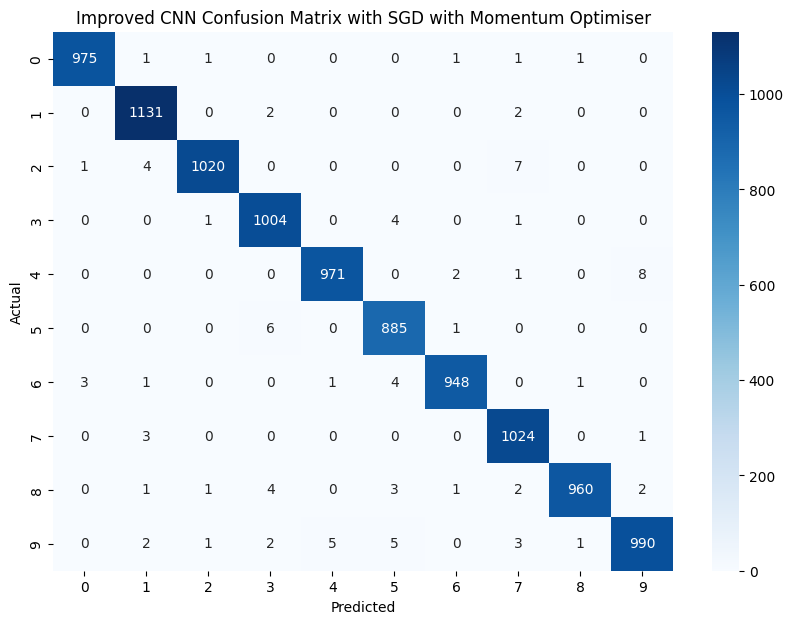

In [ ]:
y_predicted = model_sgd.predict(X_test)
y_predicted_labels = np.argmax(y_predicted, axis=1)
y_test_labels = np.argmax(y_test_categorical, axis=1)
cm_improved_cnn_sgd = tf.math.confusion_matrix(labels=y_test_labels, predictions=y_predicted_labels).numpy()

plt.figure(figsize = (10,7))
sn.heatmap(cm_improved_cnn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Improved CNN Confusion Matrix with SGD with Momentum Optimiser')
plt.show()

## Per-Class Test Accuracy

In [ ]:
# Per-class accuracy
per_class_accuracy = cm_improved_cnn_sgd.diagonal() / cm_improved_cnn_sgd.sum(axis=1)
for i, acc in enumerate(per_class_accuracy):
    print(f"Class {i}: Accuracy = {acc:.4f}")

Class 0: Accuracy = 0.9969
Class 1: Accuracy = 0.9938
Class 2: Accuracy = 0.9893
Class 3: Accuracy = 0.9891
Class 4: Accuracy = 0.9990
Class 5: Accuracy = 0.9899
Class 6: Accuracy = 0.9875
Class 7: Accuracy = 0.9942
Class 8: Accuracy = 0.9928
Class 9: Accuracy = 0.9931


## Plot first five misclassified samples

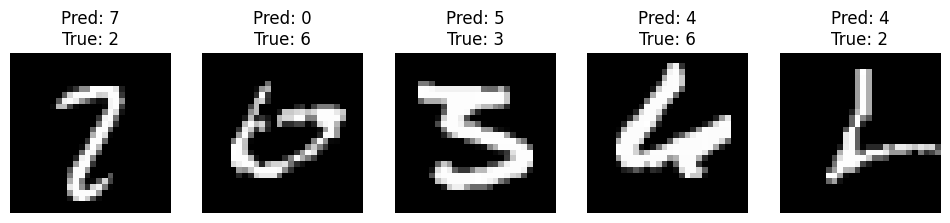

In [ ]:
# Find indices of misclassified samples
misclassified_indices = np.where(y_predicted_labels != y_test_labels)[0]

# Plot first 5 misclassified samples
plt.figure(figsize=(12, 3))
for i, idx in enumerate(misclassified_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"Pred: {y_predicted_labels[idx]}\nTrue: {y_test_labels[idx]}")
    plt.axis('off')
plt.show()